Import required librabries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Importing the data file using pd.read_excel function of pandas as our file is in xlsx format

In [2]:
# Import the required data file in pandas dataframe

cvd_data = pd.read_excel('/content/drive/MyDrive/Machine learning/CVD_predictions_dataset.xlsx')
cvd_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#checking the shape of the dataframe

cvd_data.shape

(303, 14)

the data is consist of : 303 rows & 14 columns

In [4]:
# checking data type of the dataframe and Finding out the null values in data

cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No Null values observed and All columns have numerical data

### Preliminary statistical summary of the data  

In [5]:
cvd_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# finding out for any duplicate data

duplicate = cvd_data[cvd_data.duplicated(keep=False)]
duplicate


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1



Row 163 & 164 are duplicates. We will remove the one of the duplicate data. 

In [7]:

cvd_data.drop_duplicates(inplace=True)
cvd_data.shape

# Duplicated data is removed (As now data shape is (302 - 14))

(302, 14)

### Our data contains short forms as column names which are difficult to understand. Hence, we will rename the column names as per the standard names

In [8]:
# renaming data columns for better understanding

cvd_data.rename(columns={
    'age':'age',
    'sex':'sex',
    'cp':'chest_pain_type', 
    'trestbps':'resting_blood_pressure', 
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg' : 'resting_electrocardiogram', 
    'thalach': 'max_heart_rate_achieved', 
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression', 
    'slope': 'st_slope', 
    'ca':'num_major_vessels', 
    'thal': 'thalassemia'
}, inplace=True)

cvd_data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Our data contains combination of numerical data (Eg. Resting blood sugar) and a few categorical data (Eg. Age, Sex, Thalassemia). Hence, we will divide the data as per numerical and categorical features.  


In [9]:
# Creating a copy of origical data before seperating the data

cvd_categorical = cvd_data.copy(deep=True)
cvd_categorical.shape

(302, 14)

In [10]:
# Exploring data with only numerical fearures:

num_data = cvd_categorical.loc[:,['age', 'resting_blood_pressure','cholesterol','max_heart_rate_achieved', 'target']]
num_data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,target
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1


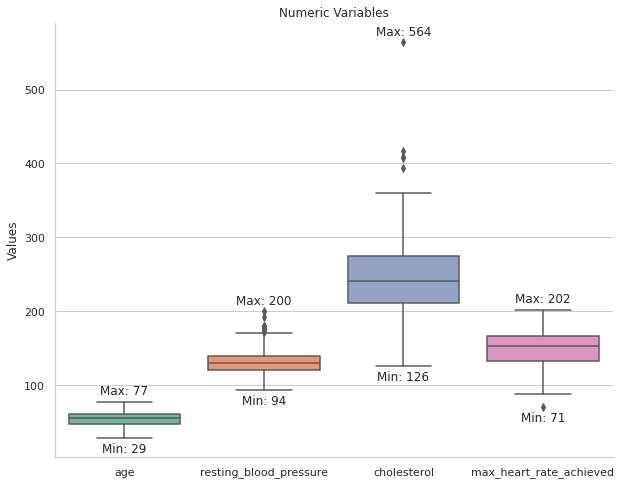

In [11]:
data=num_data.loc[:,['age', 'resting_blood_pressure','cholesterol','max_heart_rate_achieved']]
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(data=data, palette="Set2")
ax.set_title("Numeric Variables")
#ax.set_xlabel("Variables")
ax.set_ylabel("Values")
for i in range(len(data.columns)):
    col = data.columns[i]
    ax.text(i, data[col].max()+10, f"Max: {data[col].max()}", ha="center")
    ax.text(i, data[col].min()-20, f"Min: {data[col].min()}", ha="center")
    
sns.despine()
plt.show()

### Identifing the data variables which are categorical 

In [12]:
bins=[0,40,55,80]
labels = ['Young','Middle_age','Elderly']

num_data['Age_Category'] = pd.cut(num_data['age'], bins=bins, labels=labels)
Age_dist = num_data.pop('Age_Category')
num_data.insert(1,'age_category', Age_dist)
num_data.head()

chol_bins=[0,200,240,580]
chol_labels = ['Normal','Borderline','High']

num_data['cholesterol_group'] = pd.cut(num_data['cholesterol'], bins=chol_bins, labels=chol_labels)
chol_dist = num_data.pop('cholesterol_group')
num_data.insert(4,'cholesterol_group', chol_dist)
num_data.head()

,age,age_category,resting_blood_pressure,cholesterol,cholesterol_group,max_heart_rate_achieved,target
0,63,Elderly,145,233,Borderline,150,1
1,37,Young,130,250,High,187,1
2,41,Middle_age,130,204,Borderline,172,1
3,56,Elderly,120,236,Borderline,178,1
4,57,Elderly,120,354,High,163,1


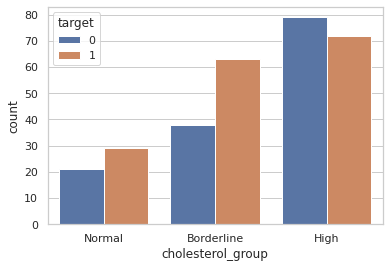

In [13]:
sns.countplot(data=num_data, x='cholesterol_group', hue='target')
plt.show()

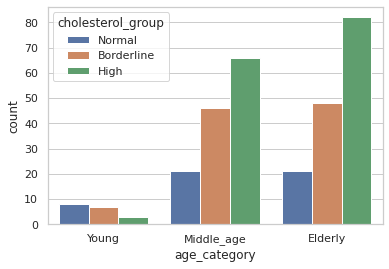

In [14]:
sns.countplot(data=num_data, x='age_category', hue='cholesterol_group')
plt.show()

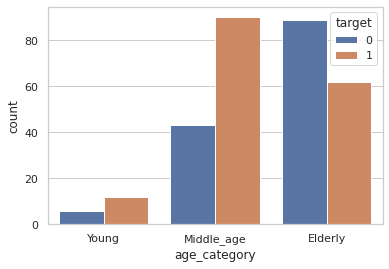

In [15]:
sns.countplot(data=num_data, x='age_category', hue='target')
plt.show()

Inferences:
1. Middle age and Elderly age group have higher cholesterol levels.
2. Frequecy of Middle age group having heart disease is elevated. 


In [16]:
cat_data = cvd_categorical[['sex','chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope','num_major_vessels','thalassemia','target']]
cat_data.head()

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiogram,exercise_induced_angina,st_slope,num_major_vessels,thalassemia,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


For better understanding, Replacing '0' and '1' value with actual categorical names. 

In [17]:
# Replacing '0' and '1' values

cat_data.replace({
    'sex': {0: 'Female', 1: 'Male'},
    'chest_pain_type': {0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3:'asymptomatic'},
    'fasting_blood_sugar': {0: 'lower than 120mg/dl', 1: 'higher than 120mg/dl'},
    'resting_electrocardiogram': {0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'},
    'exercise_induced_angina': {0: 'No', 1: 'Yes'},
    'st_slope': {0: 'upsloping', 1: 'flat',2:'downsloping'},
    'thalassemia': {1: 'fixed defect', 2: 'normal',3:'reversable defect'},
    'target': {0: 'No Heart Disease', 1: 'Heart Disease'}
}, inplace=True)

cat_data.head()

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiogram,exercise_induced_angina,st_slope,num_major_vessels,thalassemia,target
0,Male,asymptomatic,higher than 120mg/dl,normal,No,upsloping,0,fixed defect,Heart Disease
1,Male,non-anginal pain,lower than 120mg/dl,ST-T wave abnormality,No,upsloping,0,normal,Heart Disease
2,Female,atypical angina,lower than 120mg/dl,normal,No,downsloping,0,normal,Heart Disease
3,Male,atypical angina,lower than 120mg/dl,ST-T wave abnormality,No,downsloping,0,normal,Heart Disease
4,Female,typical angina,lower than 120mg/dl,ST-T wave abnormality,Yes,downsloping,0,normal,Heart Disease


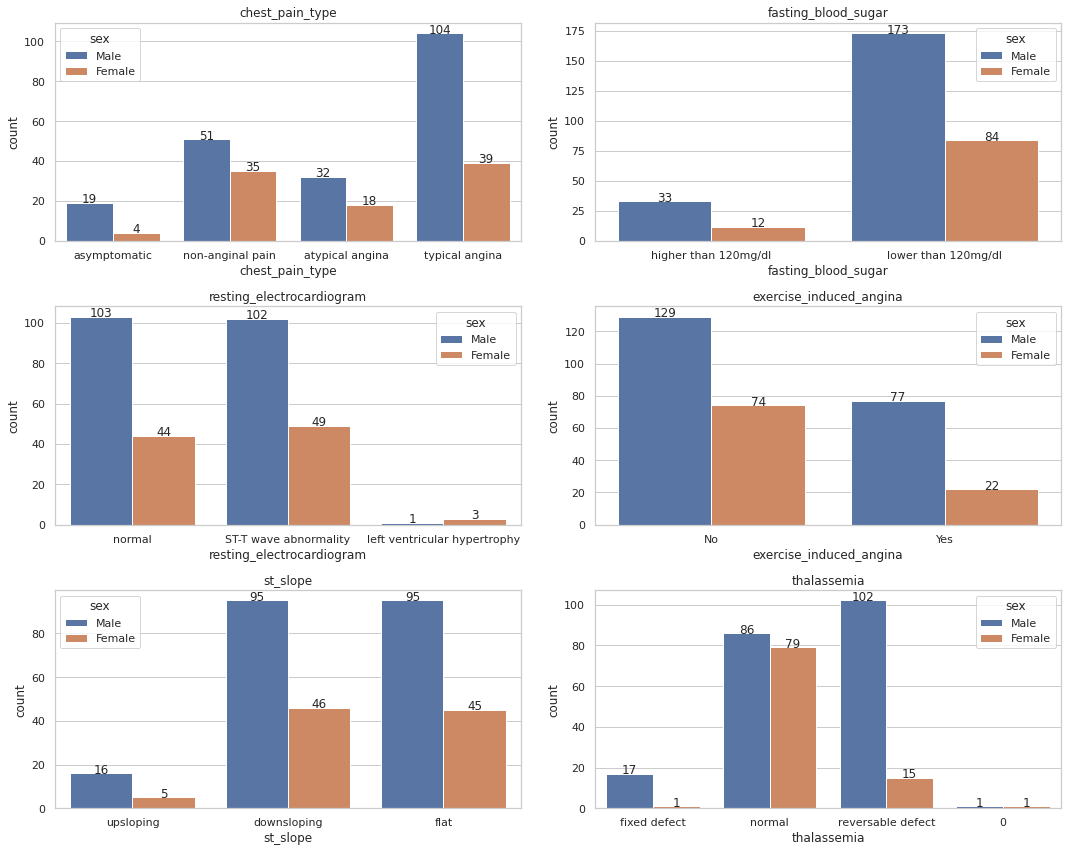

In [18]:
# Exploting the countplot for categoical data with respect to 'sex'

columns = ['chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope','thalassemia']
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, col in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sns.countplot(data=cat_data, x=columns[i], hue='sex', ax=ax)
    ax.set_title(columns[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    for patch in ax.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.text(x, y, f'{y}', ha='center')

plt.tight_layout()
plt.show()

# Overall, higher number of data is available for male patients then female. 

<AxesSubplot:xlabel='sex', ylabel='count'>

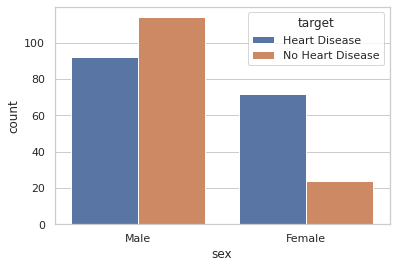

In [19]:
# Overall, higher number of data is available for male patients then female. 

sns.countplot(data=cat_data, x='sex', hue='target')

Similarly ploting categocial variables with respect to target (Heart Disease / No Heart Disease)

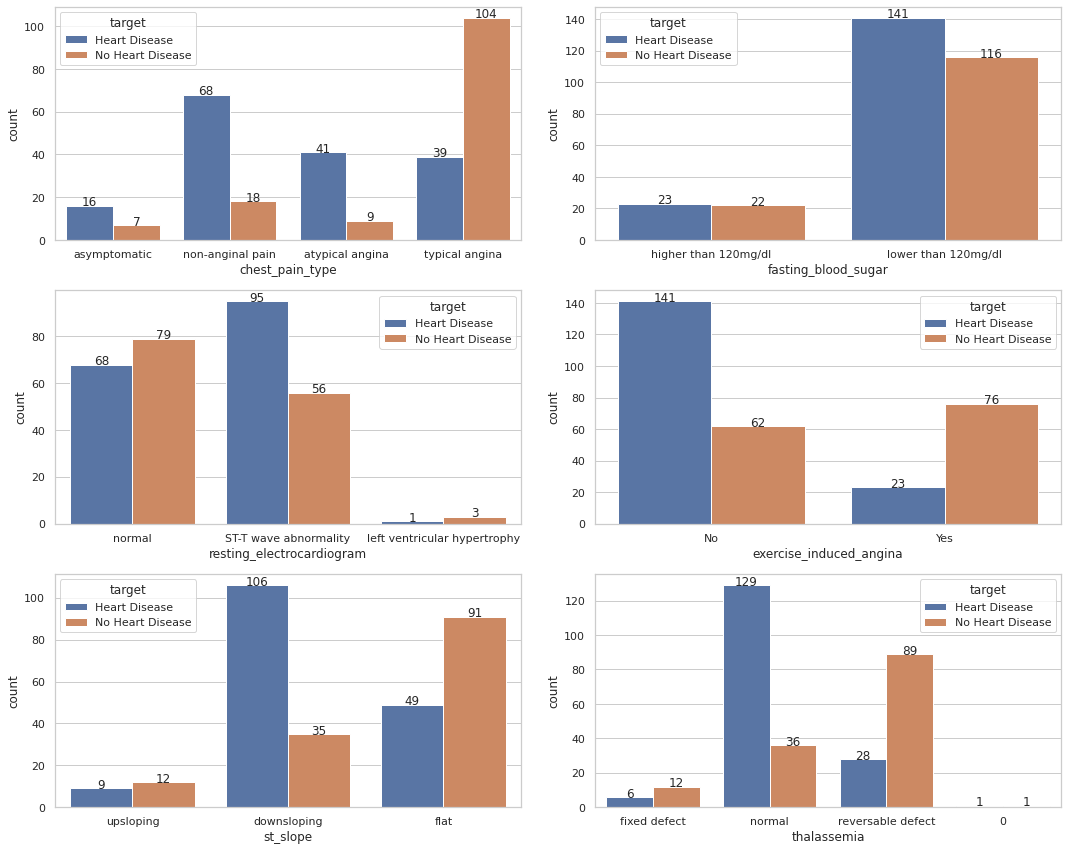

In [20]:
columns = ['chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope','thalassemia']
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, col in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    sns.countplot(data=cat_data, x=columns[i], hue='target', ax=ax)
    #ax.set_title(columns[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    for patch in ax.patches:
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height()
        ax.text(x, y, f'{y}', ha='center')

plt.tight_layout()
plt.show()

Creating correlation heatmap amoung all variables. 

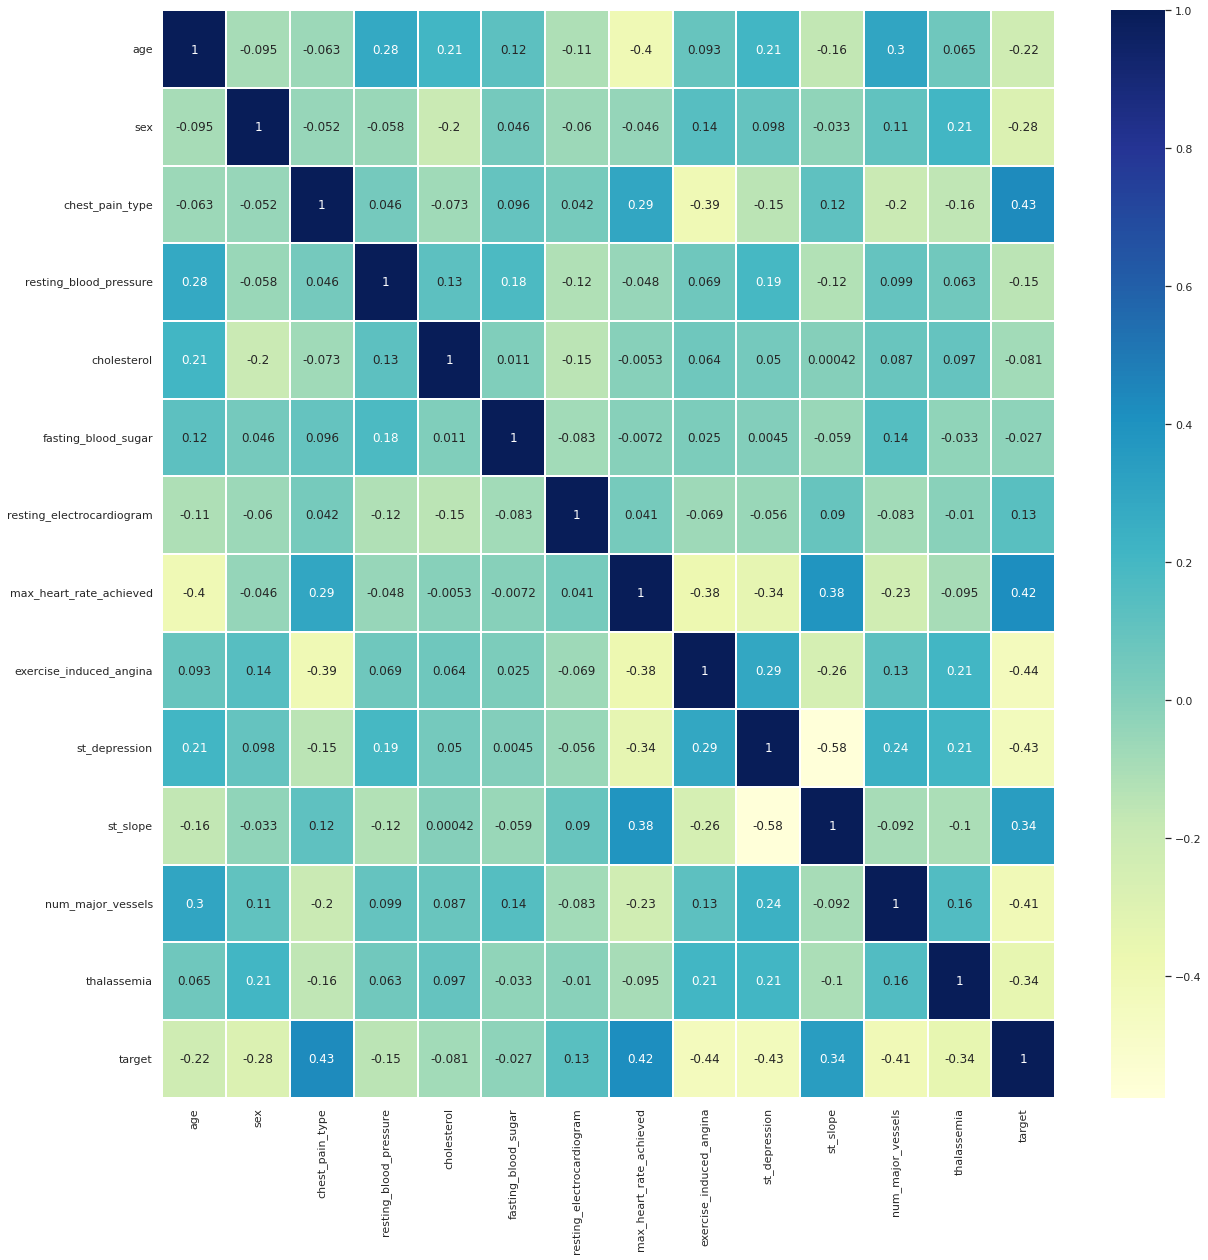

In [21]:
sns.heatmap(cvd_data.corr(),annot=True, cmap='YlGnBu', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

Inferences: 
1. Chest pain, max heart rate and st_slope is positively corelated with occurance of heart disease. 
2. Where as, exercise induced angina, and number of vessels and st_depression is negatively corelated with occurance of heart disease. 
3. Thalassemia is marginally negatively co-related with heart disease and we from above count plot, frequency of people with normal thalassemia level with heart disease were higher.  

### Creating a pair-plot with only continuous columns to check their positive or negative correlation

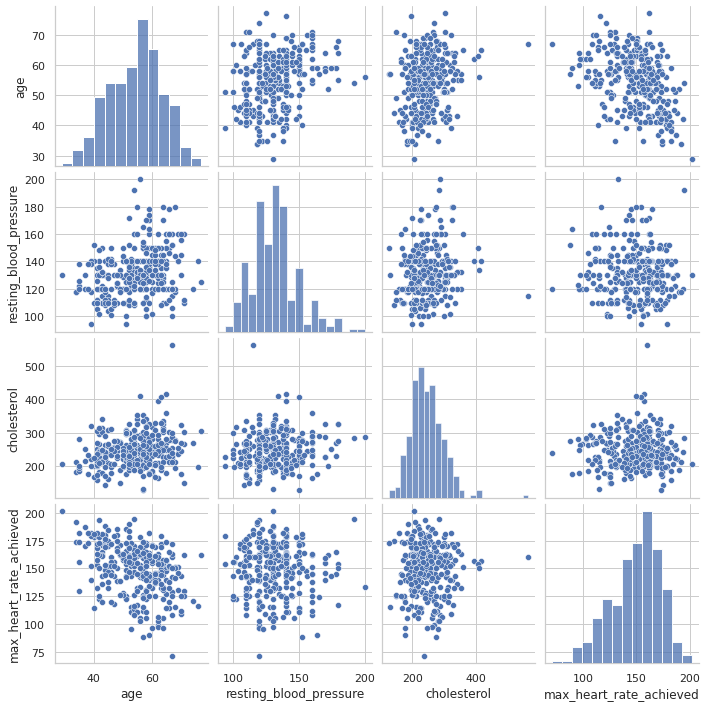

In [22]:
# 'data' variale is already defined for only numerical continous features in above code. 

sns.pairplot(data)

### Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps)

In [23]:
### Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps)

# Define the features and target variables
X = cvd_categorical['resting_blood_pressure']
y = cvd_categorical['target']

X = X.values.reshape(-1, 1) 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)


Accuracy: 0.6065573770491803
Confusion matrix:
[[ 8 19]
 [ 5 29]]


1. One can predict the heart attacks only on based on resting blood pressure with 60% accuracy. 

### Build a baseline model to predict the risk of a heart attack using a logistic regression 

In [24]:
# Before using in machine learning this data is required some pre-processing. 
# 1. Scaling of numerial data
# 2. converting categorical varibales into dummy variables.

from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
cvd_data[columns_to_scale] = standardScaler.fit_transform(cvd_data[columns_to_scale])

cvd_data = pd.get_dummies(cvd_data, columns = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_electrocardiogram', 'exercise_induced_angina', 'st_slope', 'num_major_vessels', 'thalassemia'])
cvd_data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_0,sex_1,chest_pain_type_0,chest_pain_type_1,...,st_slope_2,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [25]:
# Define the features and target variables
X = cvd_data.drop(['target'],axis=1)
y = cvd_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Define the logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy for test set for Logistic Regression =', accuracy)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(conf_matrix)

Accuracy for test set for Logistic Regression = 0.8681318681318682
Confusion matrix:
[[39  9]
 [ 3 40]]


Accuracy of predicting heart attacks with Logistic Regression is 86%. 

### Build a baseline model to predict the risk of a heart attack using Random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 12)

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=100)


classifier.fit(X1_train, y1_train)

# Predicting the Test set results
y1_pred = classifier.predict(X1_test)

accuracy1 = accuracy_score(y1_test, y1_pred)

print()
print('Accuracy for training set for Random Forest =',accuracy1)


Accuracy for training set for Random Forest = 0.7692307692307693


In [27]:
## Predicting best value for n_estimaors in the Random Forest Model. 

best_score = 0
best_n_estimators = 0

for n in range(1, 201):
    rf = RandomForestClassifier(n_estimators=n, random_state=100)
    rf.fit(X1_train, y1_train)
    y1_pred = rf.predict(X1_test)
    score = accuracy_score(y1_test, y1_pred)
    
    if score > best_score:
        best_score = score
        best_n_estimators = n
        
print("Best n_estimators:", best_n_estimators)
print("Best accuracy score:", best_score)


Best n_estimators: 105
Best accuracy score: 0.8461538461538461


### Machine Learning Reseults:

1. First scaling of numerical data and for categorical data dummy variables were obtained with standard scaler and get_dummies method. 
2. Accuracy of predicting heart disease with logistic regression model was 86.81%. 
3. Where as, we obtained accurcy of predicting heart disease with random forest at 84.61%. 

### THE END
### Dharmesh Samani